In [1]:
!pip install ultralytics
!pip install roboflow
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 138.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="P0SEg1FqqM8T7VbicEm5")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-20 in yolov5pytorch:: 100%|██████████| 756/756 [00:00<00:00, 5221.67it/s]


In [5]:
import shutil

shutil.move('football-players-detection-20/train',
            'football-players-detection-20/football-players-detection-20/train'
            )

shutil.move('football-players-detection-20/test',
            'football-players-detection-20/football-players-detection-1/test'
            )

shutil.move('football-players-detection-20/valid',
            'football-players-detection-20/football-players-detection-20/valid'
            )

'football-players-detection-20/football-players-detection-20/valid'

In [6]:
!yolo task=detect mode=train model=yolov5x.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5x.pt' with new 'model=yolov5xu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-20/data.yaml, degrees=0.0, deterministic

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(file_path)

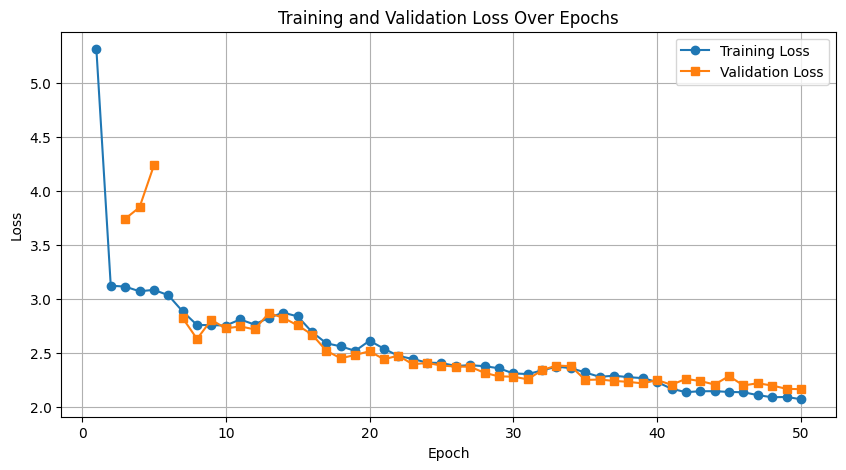

In [8]:
# Compute total training and validation loss
df["train_total_loss"] = df["train/box_loss"] + df["train/cls_loss"] + df["train/dfl_loss"]
df["val_total_loss"] = df["val/box_loss"] + df["val/cls_loss"] + df["val/dfl_loss"]

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["train_total_loss"], label="Training Loss", marker="o")
plt.plot(df["epoch"], df["val_total_loss"], label="Validation Loss", marker="s")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


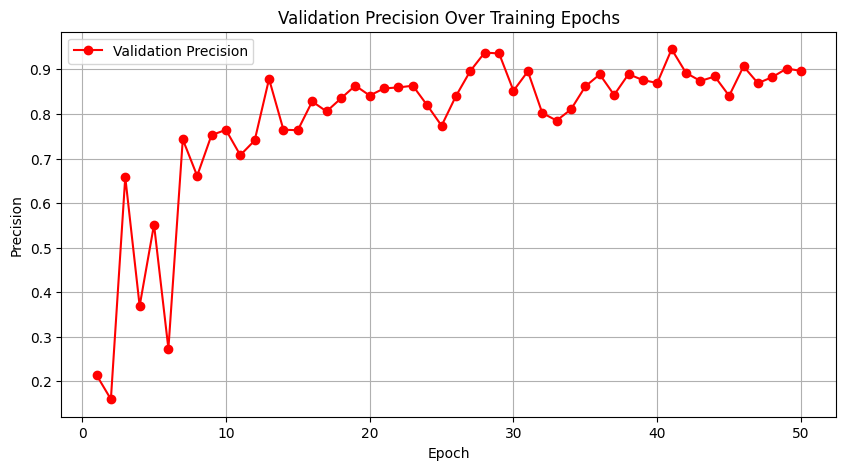

In [9]:
# Plot validation precision
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Validation Precision", marker="o", color="r")

plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Validation Precision Over Training Epochs")
plt.legend()
plt.grid(True)
plt.show()

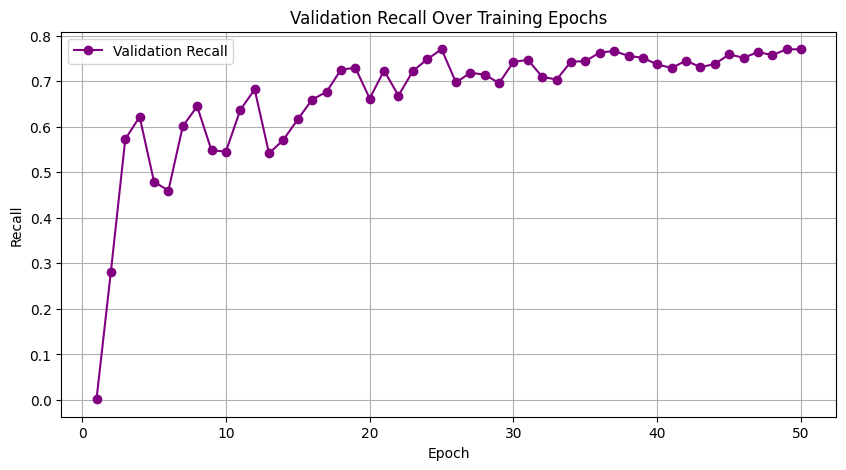

In [10]:
# Plot validation recall
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Validation Recall", marker="o", color="purple")

plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Validation Recall Over Training Epochs")
plt.legend()
plt.grid(True)
plt.show()